In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from __future__ import division

In [2]:
df = pd.read_csv('data/sensor20150701.txt')
df.head()

,DATE (MM/DD/YYYY),HOUR-HST,Avg Global Horizontal [W/m^2],Avg Global PAR [umol/s/m^2],Avg Air Temperature [deg C],Avg Dew Point Temp [deg C],Avg Rel Humidity [%],Avg Station Pressure [mBar],Avg CR1000 Temp [deg C],Avg CR1000 Battery [VDC]
0,7/1/2015,1,-1.5214,-0.6173,26.709,22.5735,78.0075,1012.2700,26.7250,11.93
1,7/1/2015,2,-0.9041,-0.5930,26.721,22.4702,77.4735,1011.5845,26.8567,11.93
2,7/1/2015,3,-1.0224,-0.5679,26.610,22.3082,77.2130,1011.0637,26.9235,11.93
3,7/1/2015,4,-0.7767,-0.4894,26.625,22.2568,76.9027,1010.8700,26.9622,11.93
4,7/1/2015,5,-0.9165,-0.6244,26.337,21.9572,76.8125,1010.7870,26.9322,11.93


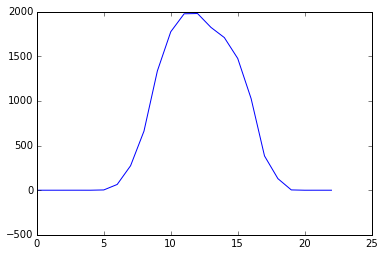

In [3]:
plt.plot(df['Avg Global PAR [umol/s/m^2]'].values)

In [195]:
col_0701_df = pd.read_csv('data/colorado20150701.txt')
col_0701_df.head()

,DATE (MM/DD/YYYY),HOUR-MST,Avg Global PSP (vent/cor) [W/m^2],Avg Global Extraterrestrial (calc) [W/m^2],Avg Global Photometric LI-210 [klux],Avg 500nm TWC Photometer [V],Avg 315nm POM-01 Photometer [nA],Avg 400nm POM-01 Photometer [uA],Avg 500nm POM-01 Photometer [uA],Avg 675nm POM-01 Photometer [uA],Avg 870nm POM-01 Photometer [uA],Avg 940nm POM-01 Photometer [uA],Avg 1020nm POM-01 Photometer [uA],Avg Global PSP [mV],Avg Zenith Angle [degrees],Avg Azimuth Angle [degrees],Avg Airmass,Avg Tower Dry Bulb Temp [deg C],Avg Deck Dry Bulb Temp [deg C],Avg SE Dry Bulb Temp [deg C],Avg Data lab Dry Bulb Temp [deg C],Avg Tower Wet Bulb Temp [deg C],Avg Tower Dew Point Temp [deg C],Avg Tower Wind Chill Temp [deg C],Avg Deck Wind Chill Temp [deg C],Avg Tower RH [%],Avg Deck RH [%],Avg SE RH [%],Avg Data lab RH [%],Avg Total Cloud Cover [%],Avg Opaque Cloud Cover [%],Avg Station Pressure [mBar],Avg Sea-Level Pressure (Est) [mBar],Avg Atmospheric Electric Field [kV/m],Avg 500nm TWC AOD,Avg 500nm Estimated AOD,Avg Broadband Turbidity,Avg Albedo (CM22),Avg Albedo (CM3),Avg Albedo (LI-200),Avg Albedo Quantum (LI-190),Avg SE-POA Angle [degrees]
0,7/1/2015,1,2.5324,0.0000,0.0011,-0.0001,0,0,0,0,0,0,0,-0.0219,116.7211,30.6832,-1.0000,20.4007,20.2898,19.7155,21.5255,14.4772,11.1037,20.4007,20.2898,55.1772,55.1703,56.7908,43.0565,-1,-1,819.7822,1021.0570,0.0266,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0850
1,7/1/2015,2,4.6280,0.0000,0.0014,-0.0001,0,0,0,0,0,0,0,-0.0242,113.9060,21.5977,-1.0000,20.2025,20.0793,19.5970,21.4163,13.7762,9.9055,20.2025,20.0793,51.6217,51.5198,52.7787,43.4797,-1,-1,819.2624,1020.5380,0.0352,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0786
2,7/1/2015,3,4.5013,0.0000,0.0013,-0.0001,0,0,0,0,0,0,0,-0.0243,108.4288,35.1641,-1.0000,20.0422,20.0528,19.4850,21.2288,13.2922,9.0829,20.0422,20.0528,49.2762,48.7005,50.0063,43.6992,-1,-1,818.8139,1020.0883,0.0357,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0743
3,7/1/2015,4,4.7167,0.0000,0.0024,-0.0001,0,0,0,0,0,0,0,-0.0231,100.8536,47.0792,-1.0000,20.8902,20.9502,20.3470,21.3292,12.8787,7.6099,20.8902,20.9502,42.3137,41.6873,42.5780,42.4400,-1,-1,818.7855,1020.0597,0.0359,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0756
4,7/1/2015,5,15.9336,13.8694,0.7915,0.0176,0,0,0,0,0,0,0,0.0542,91.6214,57.5053,16.4303,21.3253,21.2743,20.7990,21.3492,12.6926,6.8696,21.3253,21.2743,39.1450,38.9337,39.2247,41.9788,-1,-1,819.2428,1020.5175,0.0396,0.0434,0.0445,0.0424,0.0547,0.0697,0.0828,0.0188,-0.6433


In [208]:
def to_str(x):
    if x < 10:
        return '0' + x.astype(str)
    else:
        return x.astype(str)
        
col_0701_df['datetime'] = pd.to_datetime(col_0701_df['DATE (MM/DD/YYYY)']+' '+col_0701_df['HOUR-MST'].map(to_str))

In [248]:
intensities = np.insert(col_0701_df['Avg Global PSP (vent/cor) [W/m^2]'].values,0,0)

In [5]:
spectrometer = col_0701_df[col_0701_df.index==10].values.reshape(42,)[7:12]

In [6]:
wavelengths = np.array([400, 500, 675, 940, 1020])

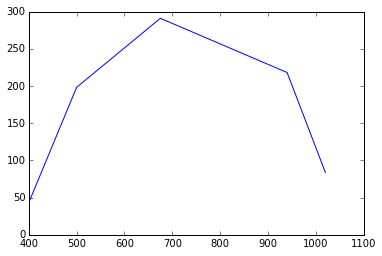

In [7]:
plt.plot(wavelengths,spectrometer)

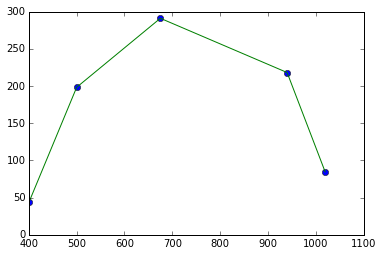

In [8]:
from scipy import interpolate

x = wavelengths
y = spectrometer

f = interpolate.interp1d(x, y)
wav_new = np.arange(400,1020, 0.5) #300 nm to 1180 nm with 0.5 nm spacing
spec_new = f(wav_new)   #recreate AM1.5 with 0.5 nm spacing

plt.plot(x, y, 'o', wav_new, spec_new, '-')
plt.show()

In [9]:
sum(wav_new*spec_new)*.5/1240/100

780.22615203649048

In [10]:
from bs4 import BeautifulSoup
#import urllib2

In [16]:
import os
PVOUTPUT_USERNAME = os.environ['PVOUTPUT_USERNAME']
PVOUTPUT_PASSWORD = os.environ['PVOUTPUT_PASSWORD']
PVOUTPUT_API = os.environ['PVOUTPUT_API']

In [65]:
import mechanize
import cookielib

cj = cookielib.CookieJar()
br = mechanize.Browser()
br.set_handle_robots(False)
br.set_cookiejar(cj)
br.open("http://pvoutput.org/")

<response_seek_wrapper at 0x109b66830 whose wrapped object = <closeable_response at 0x109b66cf8 whose fp = <socket._fileobject object at 0x10a4790d0>>>

In [67]:
br.select_form(nr=0)
br.form['login'] = PVOUTPUT_USERNAME
br.form['password'] = PVOUTPUT_PASSWORD
br.submit()

print br.response().read()

<!doctype html>





<html>
    <head>
    	<title>Add System | PVOutput</title>
        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
		<link rel="stylesheet" href="style.css?2" type="text/css" />
		<link rel="stylesheet" type="text/css" href="ext/datepicker/jquery.datepick.css" /> 
    </head>
	<script type="text/javascript" src="ext/js/jquery-1.4.2.min.js"></script>
	<script type="text/javascript" src="ext/jquery-validate/jquery.validate.min.js"></script>
	<script type="text/javascript" src="ext/datepicker/jquery.datepick.min.js"></script>
	<script type="text/javascript">

	$.validator.addMethod(
		    "australianDateOptional",
		    function ( value, element ) {

		    	if(value.length==0)
			    	return true;
		    	
		    	  var objRegExp = /^\d{1,2}(\-|\/|\.)\d{1,2}\1\d{2}$/
		    	 
		    	  if(!objRegExp.test(value))
		    	    return false;
		    	  else{
		    	    var strSeparator = value.substring(2,3) 
		    	    var arrayDate = value.split(strSepara

In [69]:
br.open("http://pvoutput.org/intraday.jsp?id=5446&sid=5473&dt=20150701")
html = br.response().read()

In [219]:
df_html = pd.read_html(html)[0]
df_html.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Optimus 14.190kW,Compare: Tips,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Time,Energy,Efficiency,Power,Average,Normalised,Temperature,Voltage,Energy Used,Power Used,NaN
2,2015-07-01,23:55,61.260kWh,4.317kWh/kW,0W,0W,0.000kW/kW,-,-,66.801kWh,"1,921W",NaN
3,2015-07-01,23:50,61.260kWh,4.317kWh/kW,0W,0W,0.000kW/kW,-,-,66.641kWh,"2,215W",NaN
4,2015-07-01,23:45,61.260kWh,4.317kWh/kW,0W,0W,0.000kW/kW,-,-,66.456kWh,"2,230W",NaN


In [220]:
df_html.columns = pd.MultiIndex.from_arrays(df_html[df_html.index==1].values)

In [221]:
df_html.drop(df_html.index[[0,1]],inplace=True)

In [222]:
df_html['Power'] = df_html['Power'].str.replace(',','')

In [223]:
df_html['Power'] = df_html['Power'].map(lambda x: x.rstrip('W'))

In [224]:
def make_a_no(x):                  
    try:
        return int(x)
    except:
        x = 0 
        return x
df_html['Power'] = df_html['Power'].map(make_a_no)

In [225]:
df_html.head()

,Date,Time,Energy,Efficiency,Power,Average,Normalised,Temperature,Voltage,Energy Used,Power Used,nan
2,2015-07-01,23:55,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.801kWh,"1,921W",NaN
3,2015-07-01,23:50,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.641kWh,"2,215W",NaN
4,2015-07-01,23:45,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.456kWh,"2,230W",NaN
5,2015-07-01,23:40,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.271kWh,"2,237W",NaN
6,2015-07-01,23:35,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.084kWh,"2,230W",NaN


In [227]:
df_html['datetime'] = pd.to_datetime(df_html['Date'] + ' ' + df_html['Time'], unit='h')

In [228]:
df_html.head()

,Date,Time,Energy,Efficiency,Power,Average,Normalised,Temperature,Voltage,Energy Used,Power Used,nan,datetime
2,2015-07-01,23:55,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.801kWh,"1,921W",NaN,2015-07-01 23:55:00
3,2015-07-01,23:50,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.641kWh,"2,215W",NaN,2015-07-01 23:50:00
4,2015-07-01,23:45,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.456kWh,"2,230W",NaN,2015-07-01 23:45:00
5,2015-07-01,23:40,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.271kWh,"2,237W",NaN,2015-07-01 23:40:00
6,2015-07-01,23:35,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.084kWh,"2,230W",NaN,2015-07-01 23:35:00


In [235]:
df_html.set_index(['datetime'],inplace=True)
df_html.head()

,Date,Time,Energy,Efficiency,Power,Average,Normalised,Temperature,Voltage,Energy Used,Power Used,nan
datetime,,,,,,,,,,,,
2015-07-01 23:55:00,2015-07-01,23:55,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.801kWh,"1,921W",NaN
2015-07-01 23:50:00,2015-07-01,23:50,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.641kWh,"2,215W",NaN
2015-07-01 23:45:00,2015-07-01,23:45,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.456kWh,"2,230W",NaN
2015-07-01 23:40:00,2015-07-01,23:40,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.271kWh,"2,237W",NaN
2015-07-01 23:35:00,2015-07-01,23:35,61.260kWh,4.317kWh/kW,0,0W,0.000kW/kW,-,-,66.084kWh,"2,230W",NaN


In [250]:
powers = df_html.resample('H', how='mean')['Power'].values

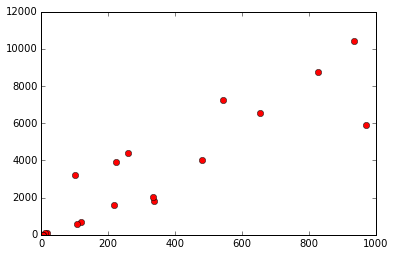

In [253]:
plt.plot(intensities,powers,'ro') #output powers vs. intensities